In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize']=(7,4)  # figure 사이즈 변경
sns.set_palette('twilight')
pal_1=sns.color_palette('coolwarm', 10)
pal_2=sns.color_palette('deep',10)

from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)

In [4]:
from sklearn.datasets import load_diabetes
# 당뇨병 환자 데이터
diabetes = load_diabetes()
x = diabetes.data[:, 2]  # bmi 독립변수/ 가장 영향을 미치는 변
y = diabetes.target
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
diabetes.data

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
diabetes.target

In [5]:
### 독립변수 1개로 회귀 알고리즘 학습하는 과정 코드짜기/ 퍼셉트론
# 가중치 초기화
w = 1.0
b = 1.0

y_hat = x[0] * w + b
print('예측 데이터 :', y_hat)
print('실제 데이터 :', y[0])

예측 데이터 : 1.0616962065186832
실제 데이터 : 151.0


In [6]:
# 가중치 값을 업데이트 조절해 예측값 바꾸기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print('변경된 예측값 :', y_hat_inc)

# 예측값 증가비율 확인
w_rate = (y_hat_inc- y_hat) / (w_inc- w)
print('예측값의 증가 정도/비율 :', w_rate)

변경된 예측값 : 1.0678658271705517
예측값의 증가 정도/비율 : 0.06169620651868429


In [7]:
# 변화율로 가중치 업데이트
w_new = w + w_rate   
print(w_new)

1.0616962065186843


In [8]:
# 변화율로 가중치 업데이트
err = y[0] - y_hat
w_new = w + w_rate * err   # 변화율로 가중치를 업데이트
print(w_new)

10.250624555903848


In [9]:
# 변화율로 절편 업데이트
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
b_rate = (y_hat_inc- y_hat) / (b_inc- b)
print('절편 변화율 :', b_rate)

err = y[0] - y_hat
b_new = b + b_rate * err
print( '절편:', b_new)

절편 변화율 : 1.0
절편: 150.9383037934813


In [10]:
######### 반복하여 w 구하기
for x_i, y_i in zip(x, y):  # zip 묶는 함수
    y_hat = x_i * w + b
    err = y_i- y_hat
    w_rate = x_i    #  중요! 기울기, 가중치와 x값은 동일 
    b_rate = 1
    w = w + w_rate * err
    b = b + b_rate * err
print('가중치 w :',w, '가중치 b:',b)

가중치 w : 587.8654539985616 가중치 b: 99.4093556453094


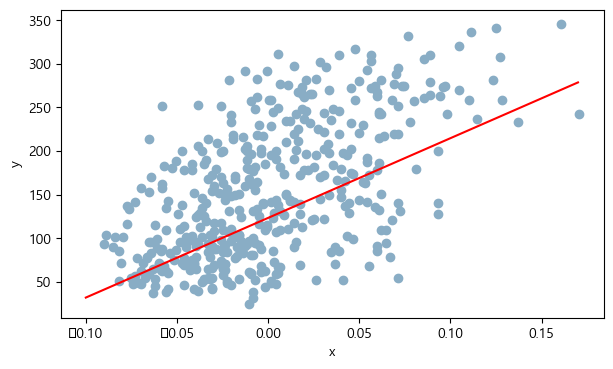

In [51]:
import matplotlib.pyplot as plt
# 예측선 그리기
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.17, 0.17 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]], color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [23]:
w*x[0] +b

163.96617708193529

In [11]:
# 에포크를 반복하기   :
w = 1.0
b = 1.0
for i in range(1000):     # 에포크: 데이터의 반복학습 횟수 
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i- y_hat
        w_rate = x_i
        b_rate = 1
        w = w + w_rate * err
        b = b + b_rate * err

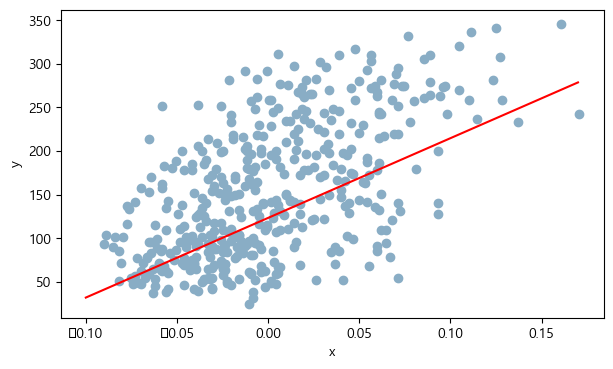

In [12]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.17, 0.17 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]], color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [35]:
w*x[0] +b

179.75963377536465

In [40]:
w*x[0] +b

179.75963377536465

In [41]:
print(w,b)

913.5973364346786 123.39414383177173


In [13]:
from sklearn.metrics import mean_squared_error

pred= x * w +b
mean_squared_error(y, pred)

4719.312052729014

In [14]:
# 에포크를 반복하기   :

w = 1.0
b = 1.0
for i in range(1000):     # 에포크: 데이터의 반복학습 횟수 
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i- y_hat
        w_rate = x_i
        b_rate = 1
        w = w + w_rate * err
        b = b + b_rate * err

In [64]:
print(w,b)

913.5973364346786 123.39414383177173


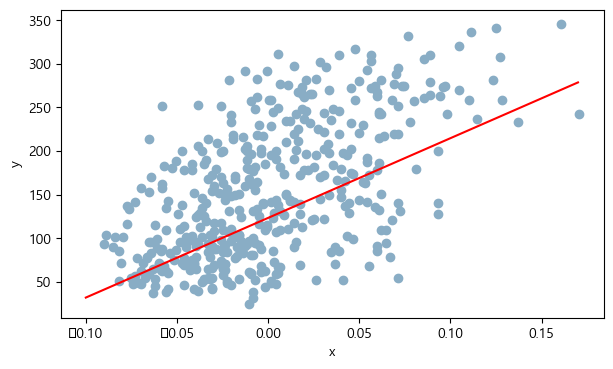

In [15]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.17, 0.17 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]], color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [16]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=13000)
sgd.fit (x.reshape(-1,1), y)

SGDRegressor(max_iter=13000)

In [67]:
print(sgd.coef_, sgd.intercept_)

[797.24747023] [152.09821795]


In [17]:
########## 완전 이해해야 함!

#뉴런 구조를 클래스로 생성
class Neuron:
    #기본 가중치 생성-초기화 w,b값(처음값), 다른 파라미터 있다면 여기서 초기값 주어야
    #가능한 0은 넣지말아야 함/ 나중엔 np.random.rand(1) 넣음
    def __init__(self):
        self.w= 1.0
        self.b= 1.0
        
    # 정방향 계산 함수 - 가져온 값 넣어 계산
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
        
    # 역방향 오차 가중치 업데이트할 값을 계산
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
        
# 훈련을 위한 fit() 메서드 구현
    def fit(self, x, y, epochs = 100):
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = -(y_i- y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

In [18]:
# 클래스 호출
neuron = Neuron()
# 학습(기본 epoch 100회)
neuron.fit(x, y)
print('학습된 w :', neuron.w)
print('학습된 b :', neuron.b)

학습된 w : 913.5973364346786
학습된 b : 123.39414383177173


In [19]:
neuron.w,neuron.b

(913.5973364346786, 123.39414383177173)

In [20]:
pred=neuron.forpass(x)

In [21]:
mean_squared_error(y,pred)

4719.312052729014

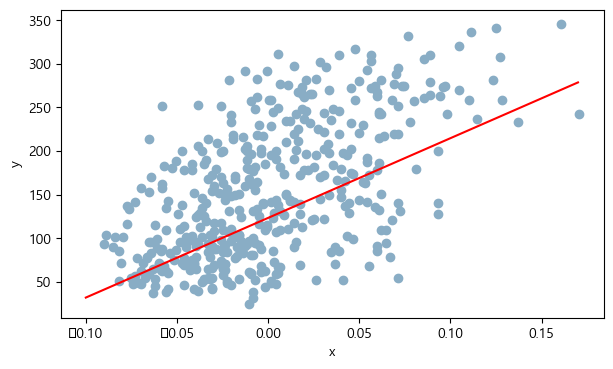

In [89]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.17, 0.17 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

#### 신경망: 분류

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

In [53]:
x=cancer.data[:,22]
y=cancer.target

In [55]:
## 분류 예시: 독립변수 1개 한번 해보기/ 숫자가 너무 커서 스케일링/ 대부분 함
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x.reshape(-1,1))
x=x_scaled.flatten()

In [62]:
###### 반복하여 w 구하기
w=1
b=1
for i in range(100):
    for x_i, y_i in zip(x, y):  # zip 묶는 함수
        z = x_i * w + b
        # 분류이기에 활성화함수(시그모이드) 
        a= 1/(1 + np.exp(-z))
        err = y_i - a
        w_rate = x_i    #  중요! 기울기, 가중치와 x값은 동일 
        b_rate = 1
        w = w + w_rate * err
        b = b + b_rate * err
print('가중치 w :',w, '가중치 b:',b)

가중치 w : -6.753469411495247 가중치 b: 1.5315343991725152


In [57]:
x.min(), x.max()

(-1.6933610341815326, 4.287337462505881)

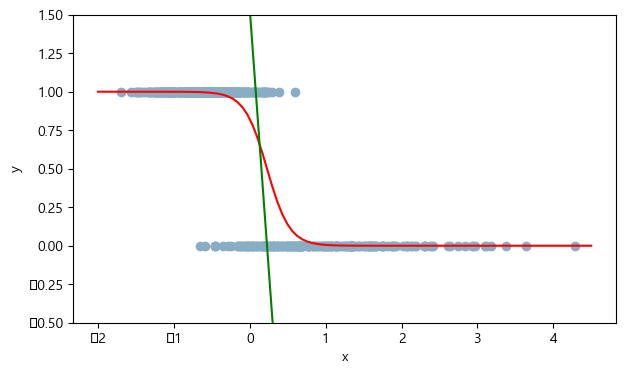

In [59]:
plt.scatter(x, y)
xx = np.linspace(-2, 4.5, 100)
z = w * xx + b
a = 1 / (1 + np.exp(-z))
plt.plot(xx, a, color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.ylim(-0.5, 1.5)

pt1 = (-2, -2 * w + b)
pt2 = (4.5, 4.5 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='green')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [88]:
x=cancer.data[:, [22,27]]
y=cancer.target

In [ ]:
## 독립변수(입력) 2개, 출력데이터 1개, 은닉층 0
# N(2) * M(1)= 가중치의 갯수       M(1)= 절편의 갯수, b의 갯수는 1개

In [89]:
# 입력데이터 2개, 출력데이터 1개, 은닉층 0개
# N(2) * M(1) = 가중치의 개수 = 2
# M(1) = 절편의 개수 = 1
w1 = 1
w2 = 1
b = 1
# 데이터
x1 = x[0, 0]
x2 = x[0, 1]

# 가중합산
z = x1 * w1 + x2 * w2 + b
a = 1 / (1 + np.exp(-z))

# 오차역전파
w1 = w1 + (y[0] - a) * x1
w2 = w2 + (y[0] - a) * x2
b = b + (y[0] - a)

print(w1, w2, b)

-183.6 0.7345999999999999 0.0


In [90]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [91]:
w1 = 1
w2 = 1
b = 1
for x_i, y_i in zip(x, y):
    x1 = x_i[0]
    x2 = x_i[1]
    
    z = x1 * w1 + x2 * w2 + b
    a = 1 / (1 + np.exp(-z))
    err = (y_i - a)
    
    w1 = w1 + err * x1
    w2 = w2 + err * x2
    b = b + err
print(w1, w2, b)

-4.9206485560714315 -3.099375164470749 1.8218072774829444


In [92]:
# 행렬로 바꾸기
w=np.ones(2)
b=1
for x_i, y_i in zip(x,y):

    z=np.sum(x_i * w) + b  # w1x1 + w2x2 + b
    a= 1/(1 + np.exp(-z))
    err=(y_i-a)
    # 오차 역전파
    # w1=w1+ err * x1
    # w2=w2+ err * x2
    w= w+ x_i * err
    b= b + err   

print(w,b)

[-4.92064856 -3.09937516] 1.8218072774829444


In [71]:
## 자세히 보기-1
np.ones(2)

array([1., 1.])

In [74]:
## 자세히 보기-2
x[0] * np.ones(2)
# [w1x1 , w2x2]

array([2.30360062, 2.29607613])

In [76]:
## 자세히 보기-2
x_i* err
# [x1 * err , x2 * err]

array([-9.00056391e-07, -1.09626344e-06])

In [77]:
## 자세히 보기-3
w + x_i* err
# [w1 + x1 * err, w2 + x2 * err]

array([0.9999991, 0.9999989])

In [107]:
## 분류 독립변수 다수 30: 가중치 30개
# 행렬화 시켜야
x = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [108]:
import numpy as np
# 가중치 초기화
w = np.ones(X_train.shape[1])
b = 1.0
# 모든 변수에 대한 가중치 적용값
z = np.sum(X_train[0] * w) + b
print('가중치 적용값 :', z)

가중치 적용값 : 920.0319740000001


In [109]:
# 안전한 계산을 위해: 범위를 정하고 그 안 값만 출력하는 함수: 
# np.clip(입력값, 최소값, 최대값)

z = np.clip(z, -100, None)

# 시그모이드 함수
a = 1 / (1 + np.exp(-z))
print('시그모이드 함수 통과 :', a)

시그모이드 함수 통과 : 1.0


In [110]:
### 클래스 만들기(분류 인공망)

class LogisticNeuron:
    # 기본 가중치 생성
    def __init__(self):
        self.w = None    # 갯수가 정해지지 않아서 None값
        self.b = None
    # 정방향 계산 함수
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    # 가중치 업데이트: 역전파
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    # 활성함수(시그모이드 함수)
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    # 훈련을 위한 fit() 메서드 생성
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)        # 로지스틱손실함수 계산 안했음
                w_grad, b_grad = self.backprop(x_i, err)
                self.w-= w_grad
                self.b-= b_grad
    # 예측 함수 생성
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]   # 리스트에 넣기
        a = self.activation(np.array(z))
        return a > 0.5   # bool 이므로 0,1이 어차피 출력됨

In [111]:
# 모델 훈련
neuron = LogisticNeuron()
neuron.fit(X_train, y_train)
print(neuron.w, neuron.b)

[ 4.44021200e+03 -1.92885000e+03  2.31902600e+04  4.82700000e+03
  1.95098500e+01 -1.11436330e+02 -2.07648288e+02 -7.92234290e+01
  2.56121000e+01  1.99302000e+01 -2.43320000e+01 -2.19092700e+02
 -7.60099000e+02 -1.49900060e+04  7.47466000e-01 -3.49603630e+01
 -5.00837511e+01 -8.96486300e+00 -4.73503200e+00 -1.33099400e+00
  4.74971700e+03 -4.81984000e+03  2.12323400e+04 -9.47580000e+03
  6.09926000e+00 -4.27425560e+02 -5.99597289e+02 -1.48915810e+02
 -4.41484000e+01 -7.82273000e+00] 569.0


In [112]:
# 정확도 예측
pred = neuron.predict(X_test)
print(pred[:5])

[False  True  True False  True]


In [118]:
# 정확도 측정 1
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7982456140350878

In [119]:
# 정확도 측정2
np.mean(pred == y_test)

0.7982456140350878

In [100]:
# 자세히 1
np.sum(neuron.w * X_test[0])+ neuron.b 

-1405333.2726926992

In [101]:
# 자세히 2
1 / (1 + np.exp(-z))

0.9999993717914176

In [117]:
## 머신러닝으로 해보기 : 훻씬 잘됨/ *** 딥러닝에 파라미터 안 정했음!

from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

pred2= dt_clf.predict(X_test)
accuracy_score(y_test,pred2)

0.9035087719298246

In [ ]:
# 손실함수: 오차 계산

In [234]:
#### 분류 손실함수ㅡ
# 손실함수의 결과값 저장 기능: 손실함수(loss) 계산하기
class SingleLayer:  # 입력계층 1개, 은닉층 없음
    def __init__(self):
        self.w = None    # 입력된 값 없으므로
        self.b = None
        # 손실 함수 저장하기 위한 리스트
        self.losses = []
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    def activation(self, z):   ### 여길 바꿈
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))   # 시그모이드 활성함수/이진분류
        return a
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0 
        for epoch in range(epochs):
            # 손실 초기화
            loss = 0
            # x의 index 랜덤하게 반환/ x,y가 각각 섞이지않도록 인덱스를 만들어 행렬로 만들어 사용
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                 # 안전한 로그 계산을 위한 범위 축소  
                a = np.clip(a, 1e-10, 1-1e-10)
                # 이걸 회귀에서 바꿔줌: 손실 계산 : MSE 
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
            # 에포크마다 평균 손실을 저장
            self.losses.append(loss / len(y))  # loss값의 평균값(로스합계/y갯수)을 저장
            print(f'###### 회귀 EPOCHS : {epoch + i}  #########')
            print(f'평균 loss : {loss}')
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return z
    # 정확도 계산 함수 생성
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [ ]:
# 작동시키기: 랜덤으로 돌리는거라서 정확도가 다르게 나옴
layer = SingleLayer()
layer.fit(X_train_scaled, y_train, epochs=1000)
print(layer.score(X_test_scaled, y_test))

In [ ]:
# 자세히 : 뒤섞는 함수 리스트들이 들어가 있으면 리스트들을 섞음
np.random.permutation(np.arange(len(X_train)))

In [ ]:
# 자세히
test=SingleLayer() 
test.fit(X_train, y_train, epochs=10)
test.losses    # 손실함수 관련 정보가 저장되어 있음 .losses

In [ ]:
# loss값이 100개 저장되어있음
layer.losses

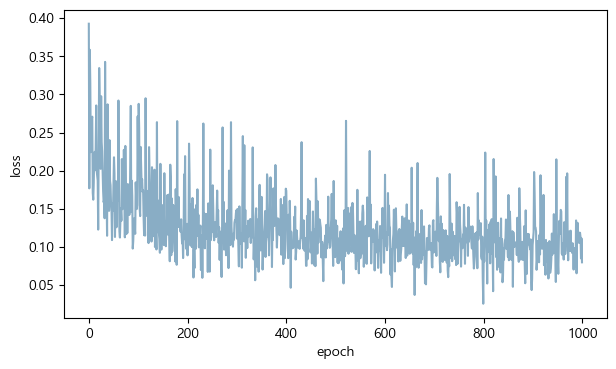

In [236]:
# 손실 함수 누적값 확인하기: 
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 자세히, 비교/ .losses가 없어서  verbose로 
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(verbose=True, loss='log_loss')  #verbose로  loss 알아보기
sgd.fit(X_train, y_train)


In [237]:
### 회귀에서 손실함수 저장하기  : 분류와 다른점 -활성함수(출력층)/ 손실함수 관련해서 바꿀것
# 손실함수의 결과값 저장 기능: 손실함수(loss) 계산하기-로지스틱 손실함수
class SingleLayerRegression: # 입력계층 1개, 은닉층 없음
    def __init__(self):
        self.w = None   # 입력된 값 없으므로
        self.b = None
        # 손실 함수 저장하기 위한 리스트
        self.losses = []
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):    #### 이걸 바꿔줘야
        a = z
        return a
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0 
        for epoch in range(epochs):
            # 손실 초기화
            loss = 0
            # x의 index 랜덤하게 반환
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)  # (y - y_hat)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                
                # 손실 계산 (SE)  (y - y_hat)^2
                loss += err ** 2

            # 에포크마다 평균 손실을 저장
            loss = loss / len(y) # MSE
            self.losses.append(loss)
            print(f'##### EPOCHS : {epoch + 1} ######')
            print(f'loss : {loss}')
            
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return z


In [238]:
reg = SingleLayerRegression()
layer.fit(X_train_scaled, y_train, epochs=100)
print(layer.score(X_test_scaled, y_test))

###### 회귀 EPOCHS : 90  #########
평균 loss : 235.44602984867976
###### 회귀 EPOCHS : 40  #########
평균 loss : 153.35229472898834
###### 회귀 EPOCHS : 185  #########
평균 loss : 150.36743894632212
###### 회귀 EPOCHS : 436  #########
평균 loss : 97.54601858584961
###### 회귀 EPOCHS : 154  #########
평균 loss : 75.77061093369976
###### 회귀 EPOCHS : 440  #########
평균 loss : 106.61309706252912
###### 회귀 EPOCHS : 255  #########
평균 loss : 111.65795744413758
###### 회귀 EPOCHS : 161  #########
평균 loss : 85.35452537137667
###### 회귀 EPOCHS : 282  #########
평균 loss : 115.58835331136346
###### 회귀 EPOCHS : 412  #########
평균 loss : 65.0015991851155
###### 회귀 EPOCHS : 195  #########
평균 loss : 76.34888239760068
###### 회귀 EPOCHS : 320  #########
평균 loss : 67.14143783271267
###### 회귀 EPOCHS : 186  #########
평균 loss : 79.41114667507969
###### 회귀 EPOCHS : 413  #########
평균 loss : 117.87745546154962
###### 회귀 EPOCHS : 373  #########
평균 loss : 146.72529220931258
###### 회귀 EPOCHS : 415  #########
평균 loss : 81.70649719260932
###

In [226]:
# 로지스틱 손실 함수

# -(y * np.log(a) + (1 - y) * np.log(1 - a))
-(0 * np.log(0.9999999999) + (1 - 0) * np.log(1 - 0.9999999999))

23.02585084720009

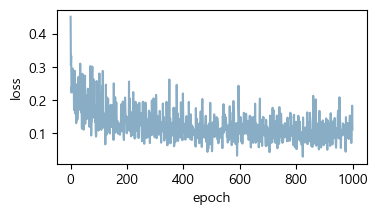

In [228]:
plt.figure(figsize=(4,2))
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# tip: 다항회귀는 딥러닝엔 없음: 은닉층 늘리면 알아서 딥러닝이 학습

In [ ]:
### 신경망 학습 : 벡터 연산 , 행렬 연산

In [213]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [215]:
def fit(self, x, y, epochs = 100):
    y = y.reshape(-1,1) # 열 벡터로 변환
    m = len(x)
    self.w = np.ones((x.shape[1], 1)) # 가중치 초기화
    self.b = 0 # 절편 초기화
    for i in range(epochs):
        z = self.forpass(x)
        a = self.activation(z)
        err =-(y - a)
        w_grad, b_grad = self.backprop(x, err)
        self.w -= w_grad
        self.b-= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)
        loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a))) 
        self.losses.append(loss)

In [239]:
### 클라스 만들어서 전체 해보기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [240]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [241]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    def forpass(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m
        b_grad = np.sum(err) / m
        return w_grad, b_grad
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    def predict(self, x):
        z = self.forpass(x)
        return z > 0
    def score(self, x, y):
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    def fit(self, x, y, epochs = 100, random_state = None):
        y = y.reshape(-1,1) # 열 벡터로 변환
        m = len(x)
        self.w = np.ones((x.shape[1], 1)) # 가중치 초기화
        self.b = 0 # 절편 초기화
        for i in range(epochs):
            z = self.forpass(x)
            a = self.activation(z)
            err = -(y - a)
            w_grad, b_grad = self.backprop(x, err)
            self.w-= w_grad
            self.b-= b_grad
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.mean(-(y*np.log(a) + (1-y)*np.log(1-a))) 
            self.losses.append(loss)


In [242]:
single_layer = SingleLayer()
single_layer.fit(X_train_scaled, y_train)
single_layer.score(X_test_scaled, y_test)

0.956140350877193

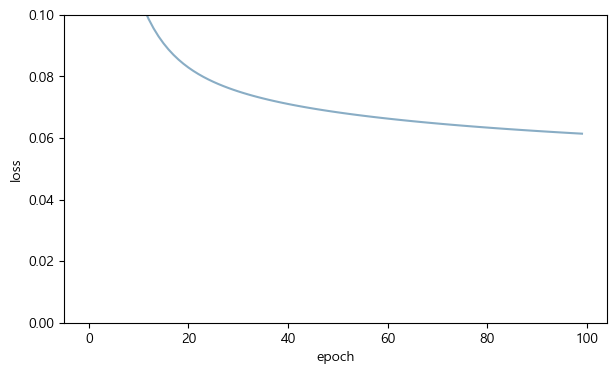

0.06137810582285915


In [244]:
plt.plot(single_layer.losses)
plt.ylim(0,0.1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print(single_layer.losses[-1])

In [250]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state=0)

In [ ]:
## 회귀에서도 한번에 계산하기 가능!  = 처음에는 오차가 많으나 줄어듦/

In [251]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
        
    def forpass(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m
        b_grad = np.sum(err) / m  # np.mean(err)
        return w_grad, b_grad
    
    def activation(self, z):
        a = z
        return a

    def predict(self, x):
        z = self.forpass(x)
        return z > 0
    def score(self, x, y):
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def fit(self, x, y, epochs = 100, random_state = None):
        y = y.reshape(-1,1) # 열 벡터로 변환
        m = len(x)
        self.w = np.ones((x.shape[1], 1)) # 가중치 초기화
        self.b = 0 # 절편 초기화
        for i in range(epochs):
            z = self.forpass(x)
            a = self.activation(z)
            err = -(y - a)
            w_grad, b_grad = self.backprop(x, err)
            self.w -= w_grad
            self.b -= b_grad
            loss = np.mean(err ** 2)
            self.losses.append(loss)

In [ ]:
layer = SingleLayer()
layer.fit(X_train, y_train, epochs=1000)
layer.losses

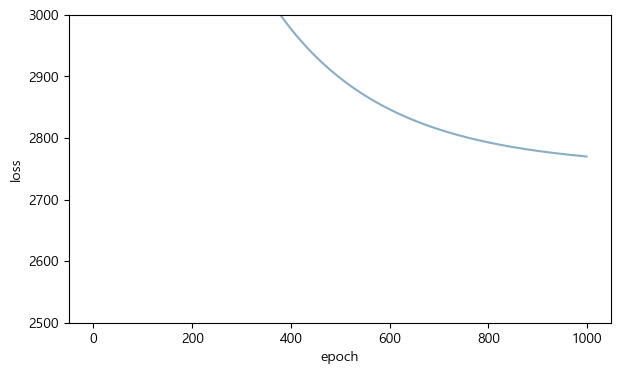

2769.847652804038


In [253]:
plt.plot(layer.losses)
plt.ylim(2500,3000)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print(layer.losses[-1])